Stephen Coates
November 5, 2024
Question 5 - who had the most key passes for the Chelsea mens team?

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
url='https://fbref.com/en/squads/cff3d9bb/2023-2024/Chelsea-Stats'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [3]:
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202411012" rel="dns-prefetch"/>
  <script>
   /* https://docs.osano.com/hc/en-us/articles/22469433444372-Google-Consent-Mode-v2  */
  window.dataLayer = window.dataLayer ||[];
      function gtag(){dataLayer.push(arguments);}
      gtag('consent','default',{
        'ad_storage':'denied',
        'analytics_storage':'denied',
        'ad_user_data':'denied',
        'ad_personalization':'denied',
        'personalization_storage':'denied',
        'functionality_storage':'granted',
        'security_storage':'granted',
        'wait_for_update': 500
      });
      gtag("set", "ads_data_redaction", true);
  </script>
  <script src="https://cmp.osano.com/16CGnCU

bs4.BeautifulSoup

## Retrieve data needed from webpage

In [4]:
player_list = [ ]
stats_table = soup.find(class_='stats_table', id="stats_passing_9").tbody
#print(stats_table)
for row in stats_table.find_all('tr'):
    player = row.find(attrs={'data-stat':'player','scope':'row'}).text
    position = row.find(attrs={'data-stat':'position'}).text
    passes = row.find(attrs={'data-stat':'passes'}).text
    passes_long = row.find(attrs={'data-stat':'passes_long'}).text
    passes_medium = row.find(attrs={'data-stat':'passes_medium'}).text
    passes_short = row.find(attrs={'data-stat':'passes_short'}).text
    passes_pct = row.find(attrs={'data-stat':'passes_pct'}).text
    assisted_shots = row.find(attrs={'data-stat':'assisted_shots'}).text
    player_list.append({'player':player, 'position': position, 'assisted_shots': assisted_shots, 'passes': passes,
                        'passes_pct': passes_pct,
                       'passes_long': passes_long, 'passes_medium': passes_medium, 'passes_short': passes_short,})
print(player_list)

chelsea_qu5_player_df = pd.DataFrame(player_list)

[{'player': 'Conor Gallagher', 'position': 'MF', 'assisted_shots': '52', 'passes': '2018', 'passes_pct': '89.2', 'passes_long': '146', 'passes_medium': '654', 'passes_short': '1116'}, {'player': 'Moisés Caicedo', 'position': 'MF', 'assisted_shots': '23', 'passes': '2119', 'passes_pct': '90.0', 'passes_long': '162', 'passes_medium': '726', 'passes_short': '1120'}, {'player': 'Nicolas Jackson', 'position': 'FW', 'assisted_shots': '38', 'passes': '666', 'passes_pct': '77.3', 'passes_long': '27', 'passes_medium': '164', 'passes_short': '386'}, {'player': 'Cole Palmer', 'position': 'FW,MF', 'assisted_shots': '72', 'passes': '1415', 'passes_pct': '79.2', 'passes_long': '186', 'passes_medium': '479', 'passes_short': '636'}, {'player': 'Axel Disasi', 'position': 'DF', 'assisted_shots': '3', 'passes': '2256', 'passes_pct': '90.0', 'passes_long': '168', 'passes_medium': '1124', 'passes_short': '913'}, {'player': 'Thiago Silva', 'position': 'DF', 'assisted_shots': '9', 'passes': '2287', 'passes_p

In [5]:
chelsea_qu5_player_df

,player,position,assisted_shots,passes,passes_pct,passes_long,passes_medium,passes_short
0,Conor Gallagher,MF,52,2018,89.2,146,654,1116
1,Moisés Caicedo,MF,23,2119,90.0,162,726,1120
2,Nicolas Jackson,FW,38,666,77.3,27,164,386
3,Cole Palmer,"FW,MF",72,1415,79.2,186,479,636
4,Axel Disasi,DF,3,2256,90.0,168,1124,913
5,Thiago Silva,DF,9,2287,94.7,186,1157,918
6,Enzo Fernández,MF,32,1862,84.5,273,744,742
7,Đorđe Petrović,GK,0,806,78.8,289,324,188
8,Raheem Sterling,"FW,MF",30,728,73.9,33,191,428
9,Levi Colwill,DF,7,1163,83.0,117,508,495


## drop records / players with 0 passes   Maybe add pass lengths
change FW,MF to MF,FW

In [6]:
sns.set()

In [7]:
chelsea_qu5_player_df['assisted_shots'] = pd.to_numeric(chelsea_qu5_player_df['assisted_shots'])
chelsea_qu5_player_df['passes'] = pd.to_numeric(chelsea_qu5_player_df['passes'])
chelsea_qu5_player_df['passes_long'] = pd.to_numeric(chelsea_qu5_player_df['passes_long'])
chelsea_qu5_player_df['passes_medium'] = pd.to_numeric(chelsea_qu5_player_df['passes_medium'])
chelsea_qu5_player_df['passes_short'] = pd.to_numeric(chelsea_qu5_player_df['passes_short'])
chelsea_qu5_player_df['passes_pct'] = pd.to_numeric(chelsea_qu5_player_df['passes_pct'])

In [8]:
chelsea_qu5a_player_df = chelsea_qu5_player_df[chelsea_qu5_player_df.passes > 5]

In [9]:
chelsea_qu5a_player_df.replace({'MF,FW':'FW,MF'}, inplace=True)
chelsea_qu5a_player_df

C:\Users\HealthCoachStephen\AppData\Local\Temp\ipykernel_9860\614791396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chelsea_qu5a_player_df.replace({'MF,FW':'FW,MF'}, inplace=True)


,player,position,assisted_shots,passes,passes_pct,passes_long,passes_medium,passes_short
0,Conor Gallagher,MF,52,2018,89.2,146,654,1116
1,Moisés Caicedo,MF,23,2119,90.0,162,726,1120
2,Nicolas Jackson,FW,38,666,77.3,27,164,386
3,Cole Palmer,"FW,MF",72,1415,79.2,186,479,636
4,Axel Disasi,DF,3,2256,90.0,168,1124,913
5,Thiago Silva,DF,9,2287,94.7,186,1157,918
6,Enzo Fernández,MF,32,1862,84.5,273,744,742
7,Đorđe Petrović,GK,0,806,78.8,289,324,188
8,Raheem Sterling,"FW,MF",30,728,73.9,33,191,428
9,Levi Colwill,DF,7,1163,83.0,117,508,495


In [10]:
chelsea_qu5a_player_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          27 non-null     object 
 1   position        27 non-null     object 
 2   assisted_shots  27 non-null     int64  
 3   passes          27 non-null     int64  
 4   passes_pct      27 non-null     float64
 5   passes_long     27 non-null     int64  
 6   passes_medium   27 non-null     int64  
 7   passes_short    27 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.9+ KB


Text(0, 0.5, 'Player Name')

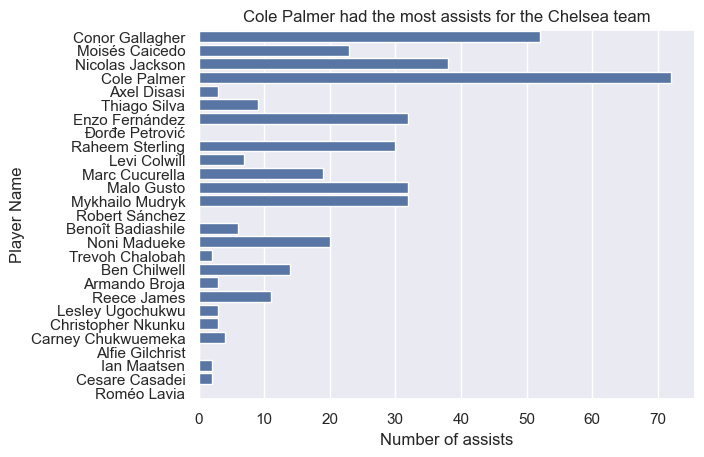

In [25]:
sns.barplot(y = 'player', x = 'assisted_shots', data=chelsea_qu5a_player_df)
plt.title('Cole Palmer had the most assists for the Chelsea team')
plt.xlabel('Number of assists')
plt.ylabel('Player Name')

<Axes: xlabel='passes', ylabel='assisted_shots'>

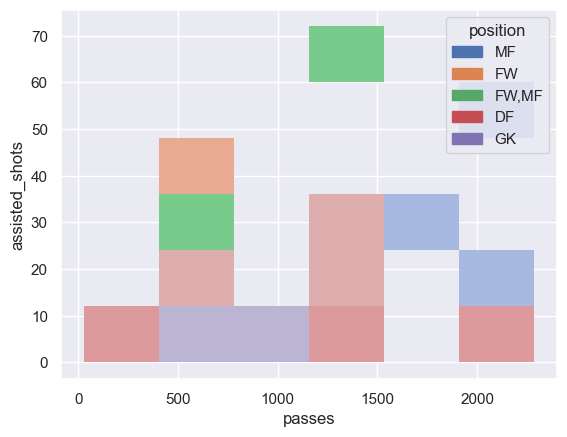

In [12]:
sns.histplot(x = 'passes', y = 'assisted_shots', data=chelsea_qu5a_player_df, hue='position')

<Axes: xlabel='passes_pct', ylabel='Count'>

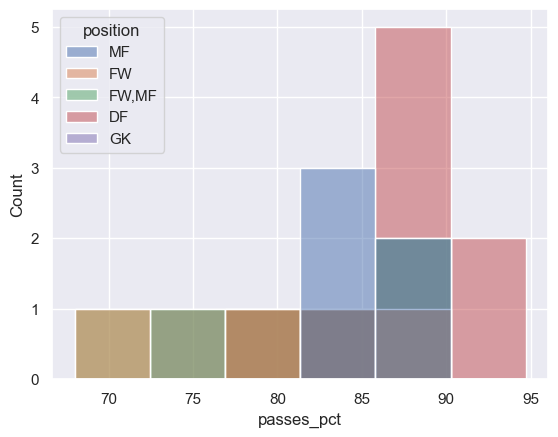

In [13]:
sns.histplot(x = 'passes_pct', data=chelsea_qu5a_player_df, hue='position')

<Axes: xlabel='passes', ylabel='assisted_shots'>

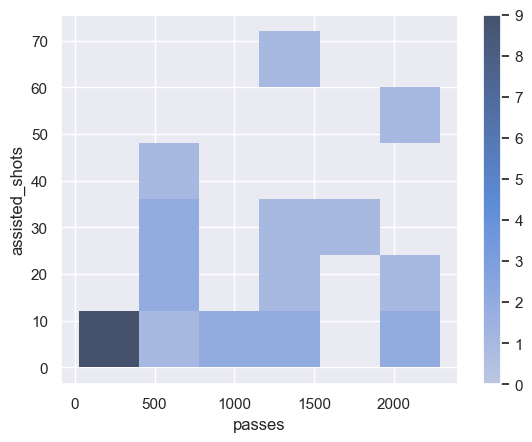

In [14]:
sns.histplot(x = 'passes', y = 'assisted_shots', data=chelsea_qu5a_player_df, cbar=True)

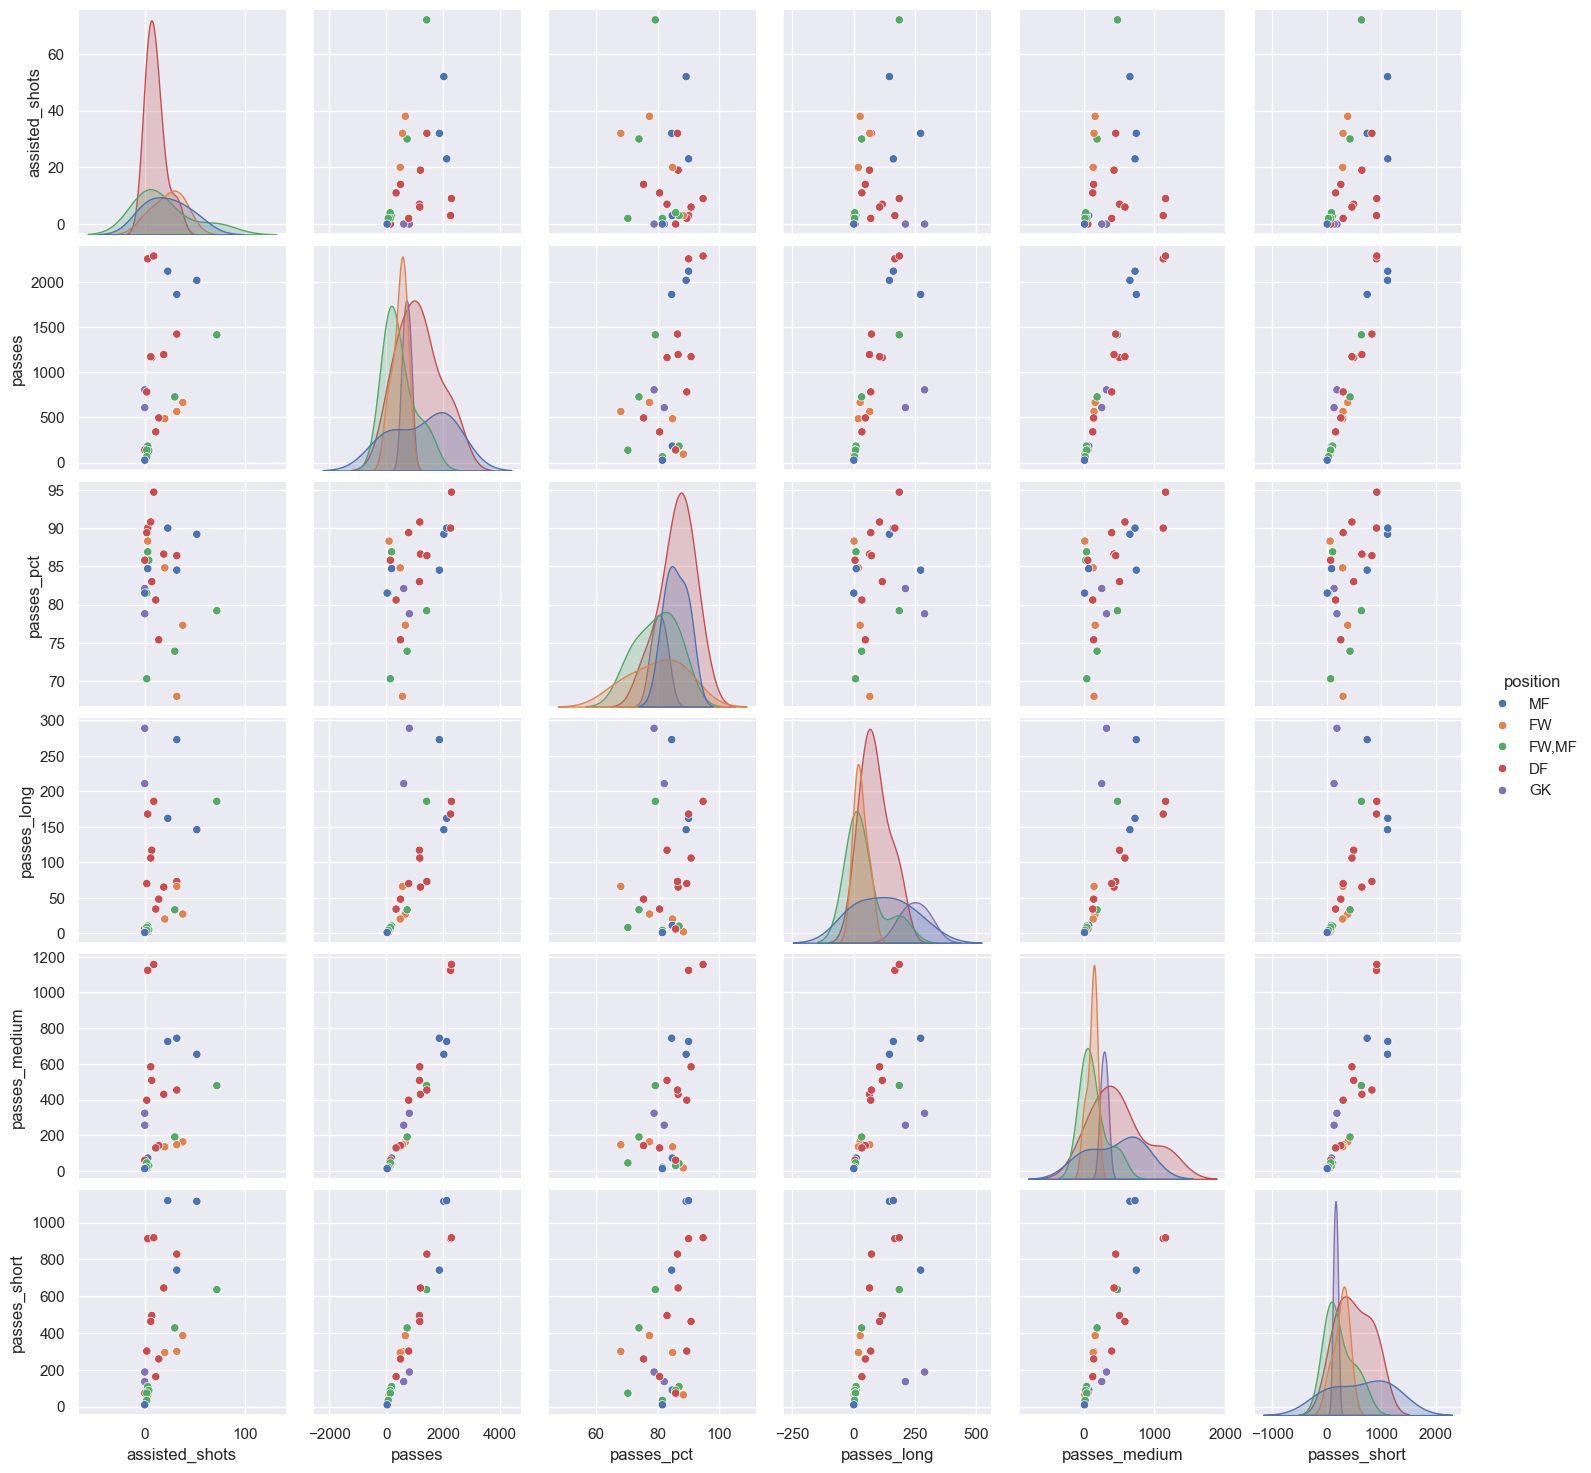

In [16]:
sns.set_style('darkgrid')
sns.pairplot(chelsea_qu5a_player_df, hue='position');

In [48]:
chelsea_qu5a_player_df

,player,position,assisted_shots,passes,passes_pct,passes_long,passes_medium,passes_short
0,Conor Gallagher,MF,52,2018,89.2,146,654,1116
1,Moisés Caicedo,MF,23,2119,90.0,162,726,1120
2,Nicolas Jackson,FW,38,666,77.3,27,164,386
3,Cole Palmer,"FW,MF",72,1415,79.2,186,479,636
4,Axel Disasi,DF,3,2256,90.0,168,1124,913
5,Thiago Silva,DF,9,2287,94.7,186,1157,918
6,Enzo Fernández,MF,32,1862,84.5,273,744,742
7,Đorđe Petrović,GK,0,806,78.8,289,324,188
8,Raheem Sterling,"FW,MF",30,728,73.9,33,191,428
9,Levi Colwill,DF,7,1163,83.0,117,508,495


In [26]:
chelsea_qu5a_player_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 26
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   player          27 non-null     object 
 1   position        27 non-null     object 
 2   assisted_shots  27 non-null     int64  
 3   passes          27 non-null     int64  
 4   passes_pct      27 non-null     float64
 5   passes_long     27 non-null     int64  
 6   passes_medium   27 non-null     int64  
 7   passes_short    27 non-null     int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 1.9+ KB


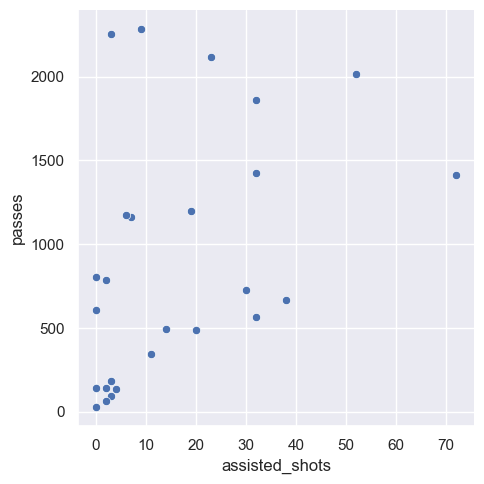

In [27]:
sns.relplot(data=chelsea_qu5a_player_df, x='assisted_shots', y='passes')

<Axes: xlabel='position', ylabel='passes'>

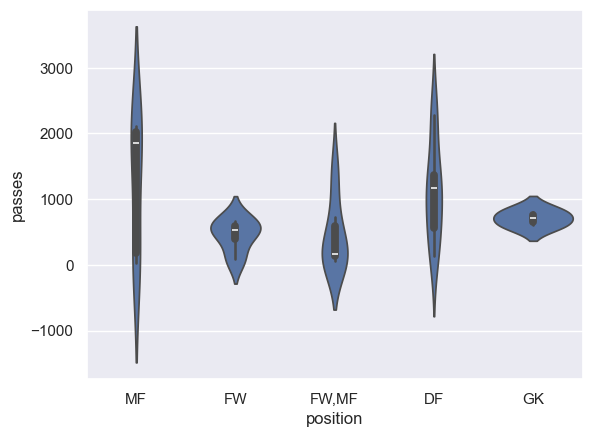

In [28]:
sns.violinplot(x = chelsea_qu5a_player_df.position, y = chelsea_qu5a_player_df.passes)

<Axes: xlabel='position', ylabel='assisted_shots'>

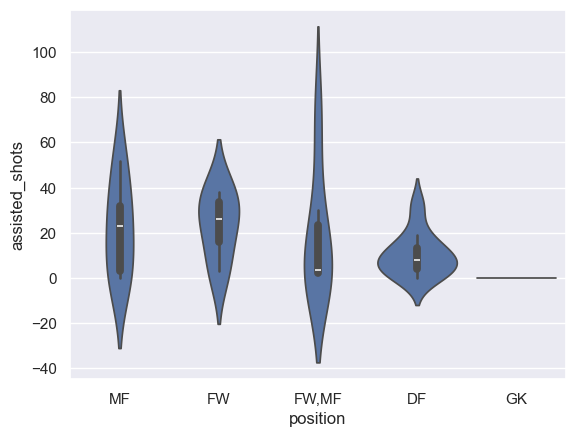

In [29]:
sns.violinplot(x = chelsea_qu5a_player_df.position, y = chelsea_qu5a_player_df.assisted_shots)